<h1>Convolutional Neural Network with Batch-Normalization </h1>


**<h3>Objective:<h3>**
1.   Compare a Convolutional Neural Network using Batch Normalization with a standard Convolutional Neural Network.
2.   Classify handwritten digits from the MNIST database.

**<h3>MNIST database<h3>**
In this tutorial, you'll learn how to use layers to build a convolutional neural network model to recognize the handwritten digits in the MNIST data set.

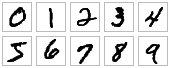

handwritten digits 0–9 from the MNIST data set

---



The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.

<h2 id="read_me">Read me Batch Norm for Convolution Operation  </h2>


Like a fully connected network, we create a <code>BatchNorm2d</code> object, but we apply it to the 2D convolution object. First, we create objects <code>Conv2d</code> object; we require the number of output channels, specified by the variable <code>OUT</code>.  


<code>self.cnn1 = nn.Conv2d(in_channels=1, out_channels=OUT, kernel_size=5, padding=2) </code>


We then create a Batch Norm  object for 2D convolution as follows:


<code>self.conv1_bn = nn.BatchNorm2d(OUT)</code>


The parameter out is the number of channels in the output. We can then apply batch norm  after  the convolution operation :


<code>x = self.cnn1(x)</code>
<p></p>
 <code> x=self.conv1_bn(x)</code>


<h2>Preparation</h2>


In [1]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

!pip install torchvision==0.9.1 torch==1.8.1
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

ERROR: Could not find a version that satisfies the requirement torchvision==0.9.1 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2)
ERROR: No matching distribution found for torchvision==0.9.1


<h2 id="Makeup_Data">Get the Data</h2>


The next code prepares a transformation pipeline that resizes the MNIST images to a consistent size of 16x16 pixels and converts them into PyTorch tensors for further processing.

In [2]:
# Define the desired image size (16x16 pixels)
IMAGE_SIZE = 16

# Create a composed transformation using PyTorch's transforms.Compose
composed = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),  # Resize the images to the specified size
    transforms.ToTensor()  # Convert the images to tensors (numeric representation)
])

The following code loads the MNIST training dataset, ensuring it is available in the specified directory. It applies the defined transformations to prepare it for use in training machine learning models.

In [3]:
# Load the training dataset with specific parameters
train_dataset = dsets.MNIST(
    root='./data',    # The root directory where the dataset will be stored
    train=True,        # Indicates that this is the training dataset
    download=True,     # Automatically download the dataset if it's not available locally
    transform=composed  # Apply the transformation defined earlier (resizing and conversion to tensors)
)

100%|██████████| 9912422/9912422 [00:00<00:00, 25597954.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32845903.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34619789.04it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13284887.56it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Load the testing dataset by setting the parameters train  <code>False</code>.


In [4]:
# Make the validating
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

We can see the data type is long.


In [5]:
# Show the data type for each element in dataset
type(train_dataset[0][1])

int

Each element in the rectangular tensor corresponds to a number representing a pixel intensity as demonstrated by the following image.


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.2.1imagenet.png" width="550" alt="MNIST data image">


Print out the fourth label


In [6]:
# The label for the fourth data element
train_dataset[3][1]

1

Plot the fourth sample


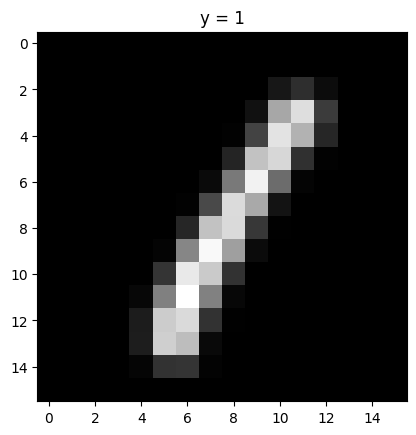

In [7]:
# The image for the fourth data element
show_data(train_dataset[3])

The fourth sample is a "1".


<!--Empty Space for separating topics-->


<h2 id="CNN">Build a Two Convolutional Neural Network Class</h2>


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [8]:
class CNN(nn.Module):

    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

Build a Convolutional Network class with two Convolutional layers and one fully connected layer. But we add Batch Norm for the convolutional layers.


In [9]:
class CNN_batch(nn.Module):

    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Function to train the model


In [10]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):

    #global variable
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

    return accuracy_list, loss_list

<h2 id="Train">Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model</h2>


There are 16 output channels for the first layer, and 32 output channels for the second layer


In [11]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

Define the loss function, the optimizer and the dataset loader


In [12]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Train the model and determine validation accuracy technically test accuracy **(This may take a long time)**


In [13]:
# Train the model
accuracy_list_normal, loss_list_normal=train_model(model=model,n_epochs=20,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

Repeat the Process for the model with  batch norm


In [14]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=20,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2>


Plot the loss with both networks.


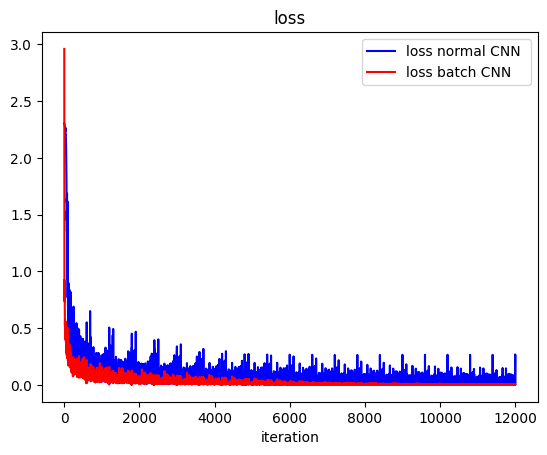

In [15]:
# Plot the loss and accuracy

# Plot the loss for a normal CNN model in blue
plt.plot(loss_list_normal, 'b', label='loss normal CNN ')

# Plot the loss for a CNN model with Batch Normalization in red
plt.plot(loss_list_batch, 'r', label='loss batch CNN')

# Label the x-axis as 'iteration'
plt.xlabel('iteration')

# Set the title of the plot to "loss"
plt.title("loss")

# Add a legend to the plot to distinguish between the two lines
plt.legend()

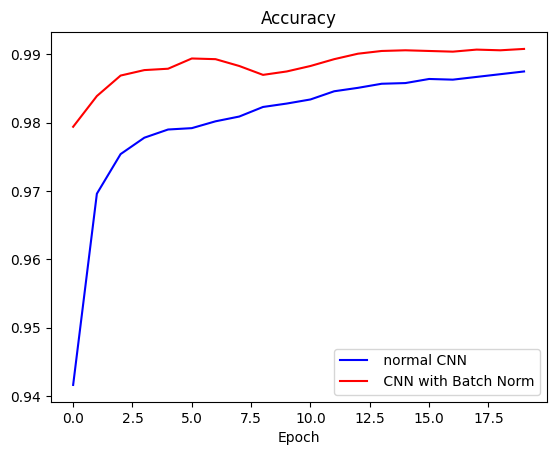

In [16]:
# Plot the accuracy

# Plot the accuracy for a normal CNN model in blue
plt.plot(accuracy_list_normal, 'b', label=' normal CNN')

# Plot the accuracy for a CNN model with Batch Normalization in red
plt.plot(accuracy_list_batch, 'r', label=' CNN with Batch Norm')

# Label the x-axis as 'Epoch'
plt.xlabel('Epoch')

# Set the title of the plot to "Accuracy"
plt.title("Accuracy")

# Add a legend to the plot to distinguish between the two lines
plt.legend()

# Display the plot
plt.show()

In summary:

1.   The CNN with Batch Normalization consistently outperforms the standard CNN.
2.   Batch Normalization accelerates convergence and enhances training stability.
3.   Accuracy is notably higher with Batch Normalization.
4.   Batch Normalization is crucial for improving image classification tasks like MNIST digit recognition.











<!--Empty Space for separating topics-->
